# Домашнее задание № 9

In [1]:
%pip install --upgrade keras
%pip install torch torchvision torchaudio
%pip install git+https://github.com/huggingface/transformers.git srsly triton
    

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found exis

In [2]:
%pip install scikit-learn pandas matplotlib transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 90.5 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 73.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depend

In [3]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
print(keras.__version__)

3.10.0


In [4]:
import os, re
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
%matplotlib inline


import keras, torch
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
from transformers import AutoModel
from transformers import AutoTokenizer

from tqdm.auto import tqdm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
MAX_LEN = 512

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Задание 1 (10 баллов).
Это задание основано на этой тетрадке - https://github.com/mannefedov/compling_nlp_hse_course/blob/master/notebooks/transfer_learning_hg/Fine_tunining_pretrained_LMs_torch.ipynb

На датасете lenta_sample.ru  дообучите две модели - modernbert-base (из семинара) и rumodernbert-base (https://huggingface.co/deepvk/RuModernBERT-base). Оцените разницу в качестве сравнив поклассовые метрики (classification_report)

Для обоих моделей качество должно быть >0.10 по f-мере (прогоните несколько экспериментов если у вас получаются нули, изменяя параметры).
Также для обоих моделей попробуйте дообучать модель и целиком и дообучать только последний слой. 
Для RuModernBERT дополнительно сравните модель, которая использует первый вектор (cls токен, как в семинаре), так и усредненный вектор по всем hidden_state, который выдает bert. 




In [6]:
data = pd.read_csv('/kaggle/input/lenta-sample/lenta_sample.csv')

In [7]:
data.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/2010/12/16/passports/,Московская милиция ужесточила паспортный режим,В Москве после серии массовых беспорядков на н...,Россия,Все,2010/12/16
1,https://lenta.ru/news/2014/05/19/student/,Московского студента ограбили на 6 миллионов р...,Неизвестные вынесли из квартиры московского ст...,Россия,NaN,2014/05/19
2,https://lenta.ru/news/2008/09/27/catch/,В Ставропольском крае обезврежены боевики,"В Ставропольском крае задержаны боевики, котор...",Россия,Все,2008/09/27
3,https://lenta.ru/news/2009/07/23/refuse/,Лужков отказался трудоустраивать китайцев с Че...,"Мэр Москвы Юрий Лужков заявил, что не намерен ...",Россия,Все,2009/07/23
4,https://lenta.ru/news/2012/09/29/factory/,По факту пожара на заводе в Югре заведено дело,Следственный комитет России возбудил уголовное...,Россия,Все,2012/09/29


In [8]:
data['topic'].value_counts()

topic
Из жизни             55
Бывший СССР          54
Наука и техника      54
Культура             53
Ценности             45
Дом                  45
Интернет и СМИ       44
Бизнес               44
Силовые структуры    40
Спорт                39
Россия               32
Экономика            32
Мир                  27
69-я параллель       13
Легпром              13
Библиотека           10
Крым                  7
Name: count, dtype: int64

In [9]:
texts = data.title.values
id2label = {i:l for i,l in enumerate(set(data.topic))}
label2id = {l:i for i,l in id2label.items()}
targets = [label2id[l] for l in data.topic]

In [10]:
train_texts, valid_texts, train_targets, valid_targets = train_test_split(texts, targets, test_size=0.05)

In [11]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

In [12]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, MAX_LEN, texts, targets):
        
        self.tokenizer = tokenizer
        self.texts = [torch.LongTensor(tokenizer.encode(t)[:MAX_LEN]) for t in texts]
        self.texts = torch.nn.utils.rnn.pad_sequence(self.texts, batch_first=True,
                                                     padding_value=self.tokenizer.pad_token_id)
        
        self.MAX_LEN = MAX_LEN
        self.length = len(texts)
        
        self.target = torch.LongTensor(targets)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        ids = self.texts[index]
        y = self.target[index]

        return ids, y
    

In [13]:
import torch.nn as nn

class CLF(nn.Module):
    
    def __init__(self, pretrained_model, tokenizer, num_classes, method="cls"):
        super().__init__()
        
        self.tokenizer = tokenizer
        self.pretrained_model = pretrained_model
        self.method = method
    
        self.drop = nn.Dropout(p=0.3)
        self.fc = nn.Linear(in_features=768, out_features=num_classes)
        self.act = nn.LogSoftmax(dim=1)
    
        if self.method == "cls":
            print("Using [CLS] token embedding for classification.")
        elif self.method == "avg_pool":
            print("Using average pooled token embeddings for classification.")
        else:
            raise ValueError("Invalid method: choose 'cls' or 'avg_pool'")

        
    def forward(self, texts):
        
        mask = (texts != self.tokenizer.pad_token_id).long()
        
        # прогоняем через BERT
        hidden = self.pretrained_model(texts, attention_mask=mask)[0]

        # берем самое первое состояние и применяем к нему линейный слой и активацию
        dense_outputs=self.fc(self.drop(hidden[:,0] ))
        outputs=self.act(dense_outputs)
        
        return outputs


In [14]:
from sklearn.metrics import f1_score

def train(model, iterator, optimizer, criterion, print_every=1000):
    
    epoch_loss = []
    epoch_f1 = []
    
    model.train()  

    for i, (texts, ys) in enumerate(iterator):
        
        optimizer.zero_grad()   
        predictions = model(texts.to(device)).squeeze()  
        loss = criterion(predictions, ys.to(device))        
        
        
        
        loss.backward()
        optimizer.step()     
        preds = predictions.detach().to('cpu').numpy().argmax(1).tolist()
        y_true = ys.tolist()
        
        epoch_loss.append(loss.item())
        epoch_f1.append(f1_score(y_true, preds, average="micro"))
        
        if not (i+1) % print_every:
            print(f'Loss: {np.mean(epoch_loss)}; F1 measure: {np.mean(epoch_f1)}')
        
    return np.mean(epoch_f1)


def evaluate(model, iterator, criterion):
    
    epoch_loss = []
    epoch_f1 = []
    
    model.eval()  
    with torch.no_grad():
        for texts, ys in iterator:   

            predictions = model(texts.to(device)).squeeze()  
            loss = criterion(predictions, ys.to(device))        
            preds = predictions.detach().to('cpu').numpy().argmax(1).tolist()
            y_true = ys.tolist()
            

            epoch_loss.append(loss.item())  
            epoch_f1.append(f1_score(y_true, preds, average="micro"))
            
    return np.mean(epoch_f1)

def predict(model, iterator):
    preds = []

    model.eval()
    with torch.no_grad():
        for texts, ys in iterator:
            predictions = model(texts.to(device)).squeeze()
            ys = predictions.detach().to("cpu").numpy().argmax(1).tolist()
            preds.extend(ys)

    return preds

## 1) Дообучите две модели - modernbert-base (из семинара) и rumodernbert-base 

In [15]:
def choose_your_bert (model_id: str, freeze_bert: bool = False):
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    base_model = AutoModel.from_pretrained(model_id)

    if freeze_bert:
        for param in base_model.parameters():
            param.requires_grad = False
            
    return base_model, tokenizer

In [16]:
def start_training(
    model_id: str,
    train_texts,
    train_targets,
    valid_texts,
    valid_targets,
    label2id,
    max_len = MAX_LEN,
    method: str = "cls",
    freeze_bert: bool = False
):
    base_model, tokenizer = choose_your_bert(model_id, freeze_bert)

    train_dataset = Dataset(tokenizer, max_len, train_texts, train_targets)
    val_dataset = Dataset(tokenizer, max_len, valid_texts, valid_targets)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = CLF(base_model, tokenizer, len(label2id), method).to(device)
    optimizer = optim.Adam(model.parameters(), lr=2e-4)
    loss_fn = nn.NLLLoss().to(device)

    return model, train_loader, val_loader, optimizer, loss_fn

In [67]:
model, train_loader, val_loader, optimizer, criterion = start_training(
    model_id="answerdotai/ModernBERT-base",
    train_texts=train_texts,
    train_targets=train_targets,
    valid_texts=valid_texts,
    valid_targets=valid_targets,
    label2id=label2id,
    freeze_bert=False
)


Using [CLS] token embedding for classification.


In [68]:
print("Percentage of trainable params:")
print('{0:.10f}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)/sum(p.numel() for p in model.parameters())))

Percentage of trainable params:
1.0000000000


In [69]:
f1s = []
f1s_eval = []

for i in range(20):
    print(i)
    f1s.append(train(model, train_loader, optimizer, criterion, 2000))
    evl = evaluate(model, val_loader, criterion)
    print('Eval - ', evl)
    f1s_eval.append(evl)

0
Eval -  0.0967741935483871
1
Eval -  0.16129032258064516
2
Eval -  0.0967741935483871
3
Eval -  0.12903225806451613
4
Eval -  0.0967741935483871
5
Eval -  0.06451612903225806
6
Eval -  0.06451612903225806
7
Eval -  0.06451612903225806
8
Eval -  0.0967741935483871
9
Eval -  0.12903225806451613
10
Eval -  0.06451612903225806
11
Eval -  0.12903225806451613
12
Eval -  0.12903225806451613
13
Eval -  0.0967741935483871
14
Eval -  0.12903225806451613
15
Eval -  0.03225806451612903
16
Eval -  0.06451612903225806
17
Eval -  0.03225806451612903
18
Eval -  0.06451612903225806
19
Eval -  0.1935483870967742


In [70]:
preds = predict(model, val_loader)
print(classification_report(valid_targets, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.50      0.40      0.44         5
           6       1.00      0.25      0.40         4
           7       0.14      0.33      0.20         3
           8       0.00      0.00      0.00         1
           9       0.09      0.50      0.15         2
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.33      0.50      0.40         2
          15       0.00      0.00      0.00         1

    accuracy                           0.19        31
   macro avg       0.15      0.14      0.11        31
weighted avg       0.25      0.19      0.18        31



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


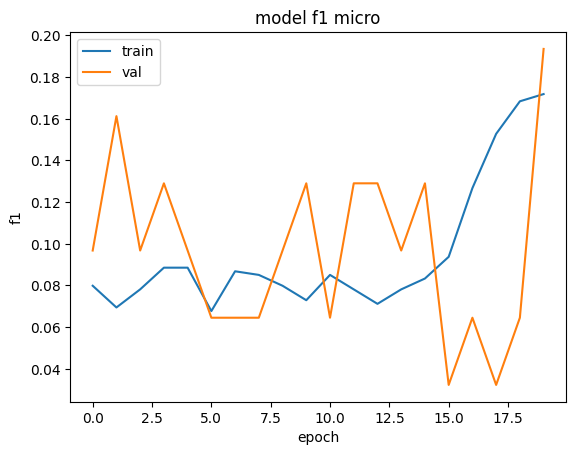

In [71]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('model f1 micro')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [72]:
model, train_loader, val_loader, optimizer, criterion = start_training(
    model_id="deepvk/RuModernBERT-base",
    train_texts=train_texts,
    train_targets=train_targets,
    valid_texts=valid_texts,
    valid_targets=valid_targets,
    label2id=label2id,
    freeze_bert=False
)

Using [CLS] token embedding for classification.


In [73]:
print("Percentage of trainable params:")
print('{0:.10f}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)/sum(p.numel() for p in model.parameters())))

Percentage of trainable params:
1.0000000000


In [74]:
f1s = []
f1s_eval = []

for i in range(20):
    print(i)
    f1s.append(train(model, train_loader, optimizer, criterion, 2000))
    evl = evaluate(model, val_loader, criterion)
    print('Eval - ', evl)
    f1s_eval.append(evl)

0
Eval -  0.12903225806451613
1
Eval -  0.0967741935483871
2
Eval -  0.0967741935483871
3
Eval -  0.0967741935483871
4
Eval -  0.12903225806451613
5
Eval -  0.0967741935483871
6
Eval -  0.16129032258064516
7
Eval -  0.0967741935483871
8
Eval -  0.12903225806451613
9
Eval -  0.16129032258064516
10
Eval -  0.1935483870967742
11
Eval -  0.16129032258064516
12
Eval -  0.2903225806451613
13
Eval -  0.22580645161290322
14
Eval -  0.25806451612903225
15
Eval -  0.2903225806451613
16
Eval -  0.22580645161290322
17
Eval -  0.22580645161290322
18
Eval -  0.3225806451612903
19
Eval -  0.3225806451612903


In [75]:
preds = predict(model, val_loader)
print(classification_report(valid_targets, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         3
           5       0.50      0.80      0.62         5
           6       0.33      0.25      0.29         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         2
          15       0.33      1.00      0.50         1
          16       0.00      0.00      0.00         0

    accuracy                           0.32        31
   macro avg       0.31      0.37      0.32        31
weighted avg       0.28   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklea

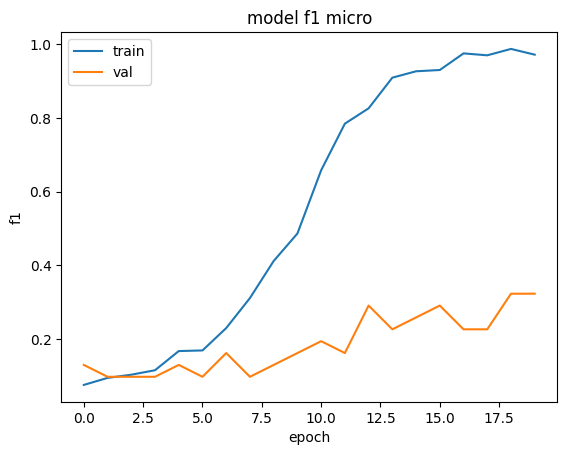

In [76]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('model f1 micro')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

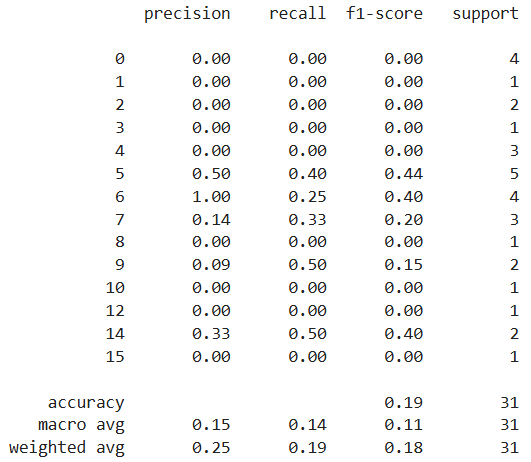  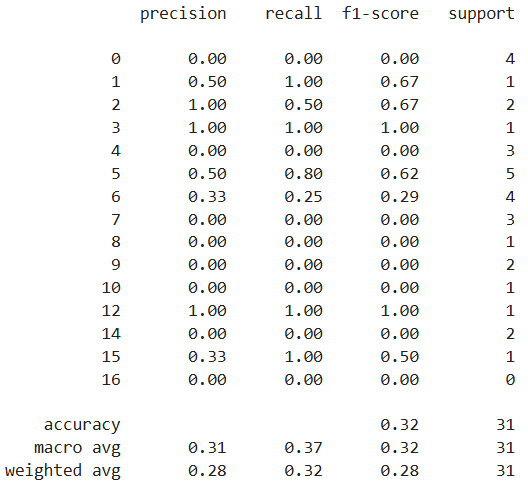
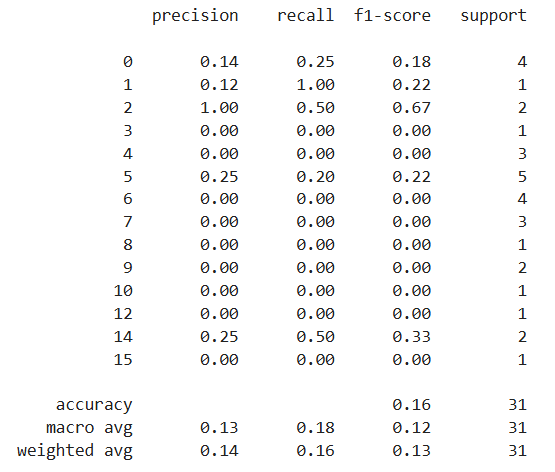
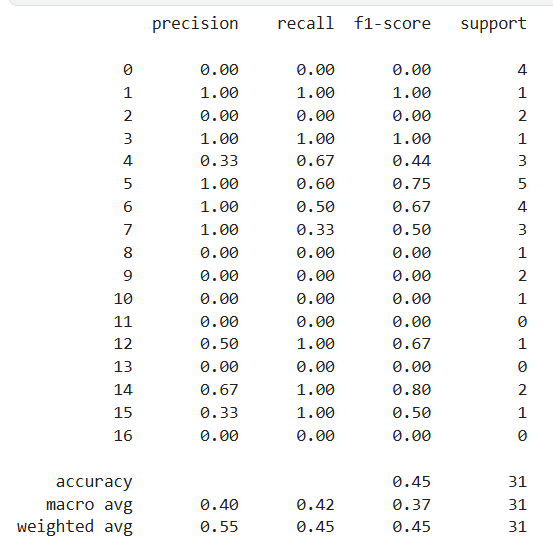

Macro F1 > 0.10 в обеих, weighted F1 тоже > 0.10, руберт обучился лучше. В общем, приемлемо

## 2) Для обоих моделей попробуйте дообучать модель и целиком и дообучать только последний слой

In [77]:
model, train_loader, val_loader, optimizer, criterion = start_training(
    model_id="answerdotai/ModernBERT-base",
    train_texts=train_texts,
    train_targets=train_targets,
    valid_texts=valid_texts,
    valid_targets=valid_targets,
    label2id=label2id, freeze_bert=True
)

Using [CLS] token embedding for classification.


In [78]:
print("Percentage of trainable params:")
print('{0:.10f}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)/sum(p.numel() for p in model.parameters())))

Percentage of trainable params:
0.0000877222


In [79]:
f1s = []
f1s_eval = []

for i in range(20):
    print(i)
    f1s.append(train(model, train_loader, optimizer, criterion, 2000))
    evl = evaluate(model, val_loader, criterion)
    print('Eval - ', evl)
    f1s_eval.append(evl)

0
Eval -  0.16129032258064516
1
Eval -  0.1935483870967742
2
Eval -  0.22580645161290322
3
Eval -  0.22580645161290322
4
Eval -  0.25806451612903225
5
Eval -  0.1935483870967742
6
Eval -  0.25806451612903225
7
Eval -  0.12903225806451613
8
Eval -  0.1935483870967742
9
Eval -  0.12903225806451613
10
Eval -  0.12903225806451613
11
Eval -  0.12903225806451613
12
Eval -  0.12903225806451613
13
Eval -  0.06451612903225806
14
Eval -  0.1935483870967742
15
Eval -  0.16129032258064516
16
Eval -  0.12903225806451613
17
Eval -  0.12903225806451613
18
Eval -  0.12903225806451613
19
Eval -  0.0967741935483871


In [80]:
preds = predict(model, val_loader)
print(classification_report(valid_targets, preds))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.12      1.00      0.22         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.25      0.20      0.22         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.10        31
   macro avg       0.04      0.10      0.05        31
weighted avg       0.08      0.10      0.08        31



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


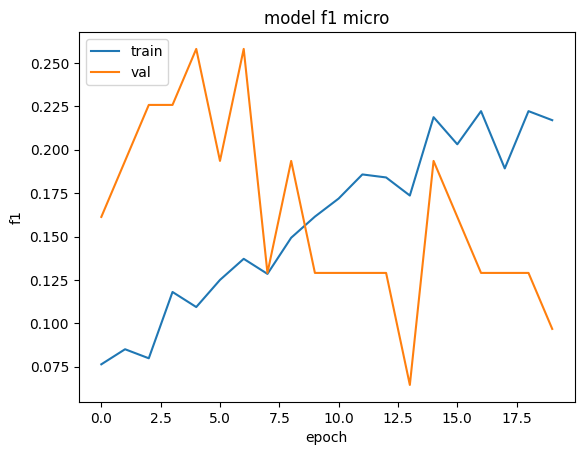

In [81]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('model f1 micro')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [82]:
model, train_loader, val_loader, optimizer, criterion = start_training(
    model_id="deepvk/RuModernBERT-base",
    train_texts=train_texts,
    train_targets=train_targets,
    valid_texts=valid_texts,
    valid_targets=valid_targets,
    label2id=label2id,
    freeze_bert=True
)

Using [CLS] token embedding for classification.


In [83]:
print("Percentage of trainable params:")
print('{0:.10f}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)/sum(p.numel() for p in model.parameters())))

Percentage of trainable params:
0.0000877222


In [84]:
f1s = []
f1s_eval = []

for i in range(20):
    print(i)
    f1s.append(train(model, train_loader, optimizer, criterion, 2000))
    evl = evaluate(model, val_loader, criterion)
    print('Eval - ', evl)
    f1s_eval.append(evl)

0
Eval -  0.16129032258064516
1
Eval -  0.06451612903225806
2
Eval -  0.06451612903225806
3
Eval -  0.12903225806451613
4
Eval -  0.12903225806451613
5
Eval -  0.12903225806451613
6
Eval -  0.0967741935483871
7
Eval -  0.12903225806451613
8
Eval -  0.12903225806451613
9
Eval -  0.0967741935483871
10
Eval -  0.12903225806451613
11
Eval -  0.0967741935483871
12
Eval -  0.12903225806451613
13
Eval -  0.0967741935483871
14
Eval -  0.16129032258064516
15
Eval -  0.12903225806451613
16
Eval -  0.12903225806451613
17
Eval -  0.12903225806451613
18
Eval -  0.12903225806451613
19
Eval -  0.0967741935483871


In [85]:
preds = predict(model, val_loader)
print(classification_report(valid_targets, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         1
           9       0.08      1.00      0.15         2
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1

    accuracy                           0.10        31
   macro avg       0.04      0.10      0.04        31
weighted avg       0.05      0.10      0.05        31



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


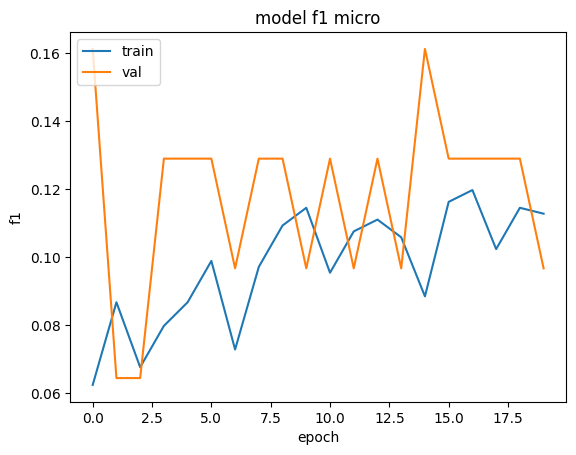

In [86]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('model f1 micro')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

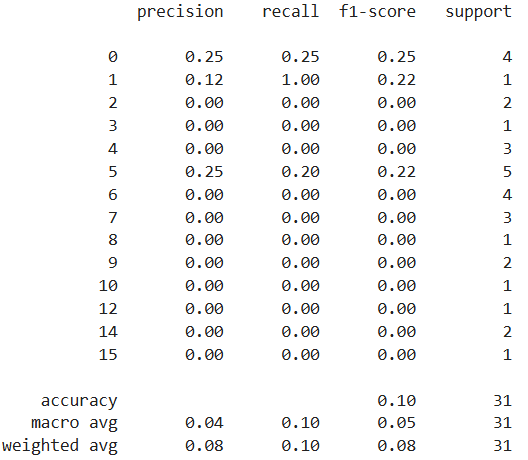  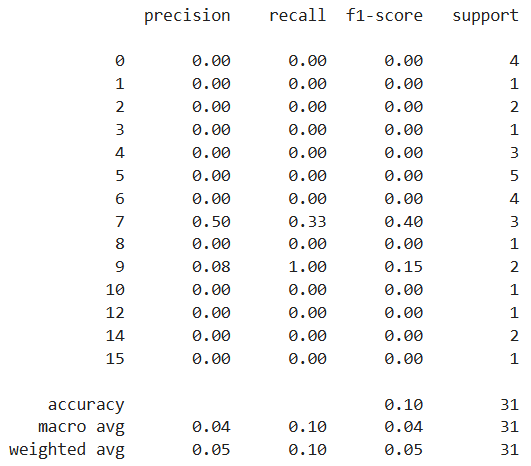

А вот с заморозкой обе едва переползли за 0.10. Причем невошедшие эксперименты с большим количеством эпох сильно существенно не помогли.

## Усредненный вектор по всем hidden_state

In [87]:
model, train_loader, val_loader, optimizer, criterion = start_training(
    model_id="deepvk/RuModernBERT-base",
    train_texts=train_texts,
    train_targets=train_targets,
    valid_texts=valid_texts,
    valid_targets=valid_targets,
    label2id=label2id,
    method = 'avg_pool',
    freeze_bert=False
)

Using average pooled token embeddings for classification.


In [88]:
print("Percentage of trainable params:")
print('{0:.10f}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)/sum(p.numel() for p in model.parameters())))

Percentage of trainable params:
1.0000000000


In [89]:
f1s = []
f1s_eval = []

for i in range(30):
    print(i)
    f1s.append(train(model, train_loader, optimizer, criterion, 2000))
    evl = evaluate(model, val_loader, criterion)
    print('Eval - ', evl)
    f1s_eval.append(evl)

0
Eval -  0.06451612903225806
1
Eval -  0.12903225806451613
2
Eval -  0.25806451612903225
3
Eval -  0.25806451612903225
4
Eval -  0.41935483870967744
5
Eval -  0.41935483870967744
6
Eval -  0.4838709677419355
7
Eval -  0.4838709677419355
8
Eval -  0.41935483870967744
9
Eval -  0.3870967741935484
10
Eval -  0.45161290322580644
11
Eval -  0.45161290322580644
12
Eval -  0.41935483870967744
13
Eval -  0.4838709677419355
14
Eval -  0.5483870967741935
15
Eval -  0.4838709677419355
16
Eval -  0.45161290322580644
17
Eval -  0.3870967741935484
18
Eval -  0.45161290322580644
19
Eval -  0.45161290322580644
20
Eval -  0.41935483870967744
21
Eval -  0.45161290322580644
22
Eval -  0.4838709677419355
23
Eval -  0.4838709677419355
24
Eval -  0.4838709677419355
25
Eval -  0.4838709677419355
26
Eval -  0.4838709677419355
27
Eval -  0.4838709677419355
28
Eval -  0.4838709677419355
29
Eval -  0.4838709677419355


In [90]:
preds = predict(model, val_loader)
print(classification_report(valid_targets, preds))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.33      1.00      0.50         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       0.33      0.67      0.44         3
           5       1.00      0.60      0.75         5
           6       0.50      0.50      0.50         4
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.25      1.00      0.40         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0

    accuracy                           0.48        31
   macro avg       0.46   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklea

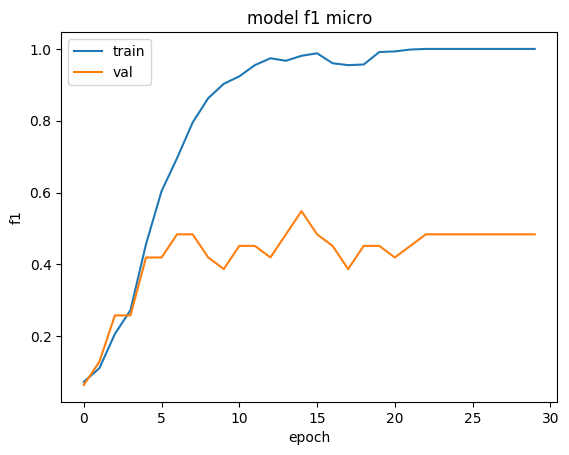

In [91]:
plt.plot(f1s)
plt.plot(f1s_eval)
plt.title('model f1 micro')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

В итоге, с hidden_state получились самые лучшие результаты.